In [1]:
import requests
import os
import pandas as pd
from bs4 import BeautifulSoup
from env import github_token, github_username
import acquire as aqr
import prepare as prep
import explore as exp
import visual as vis

import json
import nltk

import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jongarcia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Specify the file name where you want to save the list
file_name = "repo_processed.json"

# Load the REPOS list from the JSON file
with open(file_name, 'r') as file:
    repo_loaded = json.load(file)

In [3]:
repos_df = pd.DataFrame(repo_loaded)
repos_df

,repo,language,readme_contents
0,AtsushiSakai/PythonRobotics,Python,"<img src=""https://github.com/AtsushiSakai/Pyth..."
1,kiloreux/awesome-robotics,None,Awesome Robotics\n================\n\n[![Aweso...
2,NxRLab/ModernRobotics,Python,"# Modern Robotics: Mechanics, Planning, and C..."
3,mithi/robotics-coursework,None,# [🐳](https://mithi.github.io/deep-blueberry) ...
4,onlytailei/CppRobotics,C++,# CppRobotics\n\nThis is the cpp implementatio...
...,...,...,...
672,CatchZeng/dingtalk,Go,# dingtalk\n\n![Go](https://github.com/CatchZe...
673,1c7/Translate-Subtitle-File,None,## 字幕组机翻小助手 - [视频演示](https://www.bilibili.com/...
674,landy22granatt/Kumpulan-Script-Termux,Python,pkg update && pkg upgrade\npkg install bash\np...
675,cirosantilli/china-dictatorship,HTML,"<style>\npre{ white-space:pre }\n#header,#cont..."


In [4]:
# Define lists for additional and exclusionary words
extra_words = [
    'C++', 'Python', 'JavaScript', 'C', 'Java', 'TypeScript',
    'C#', 'Rust', 'Ruby', 'Kotlin', 'Julia', 'PHP', 'Swift',
    'Common Lisp', 'Scheme', 'Dart', 'Scala', 'Objective-C',
    'Lua', 'Prolog', 'ro'
]

exclude_words = []

# List of other technologies, not languages
non_languages = [
    "CMake", "Jupyter Notebook", "HTML", "Go", "Shell", "TeX", 
    "CMake", "Dockerfile", "OpenSCAD", "MQL5", "Vue", "Smali", 
    "RobotFramework", "Cuda", "SCSS"
]

# Define the list of acceptable languages
labeled_languages = ['C++', 'Python']

# Process the DataFrame 'repos_df' by applying text preprocessing, filtering, and language categorization
repos_df = prep.process_dataframe(repos_df, extra_words, exclude_words, 'lemmatize', labeled_languages, non_languages)

# Display the first few rows of the processed DataFrame
repos_df.head()

# NOTES
# Remove any word bigger than n

,repo,language,readme
0,AtsushiSakai/PythonRobotics,Python,pythonrobotics githubactionlinuxci githubactio...
1,kiloreux/awesome-robotics,Other,awesome robotics awesome list various book cou...
2,NxRLab/ModernRobotics,Python,modern robotics mechanic planning control code...
3,mithi/robotics-coursework,Other,want use arduino raspberry pi make robot short...
4,onlytailei/CppRobotics,C++,cpprobotics cpp implementation pythonrobotics ...


In [21]:
filename = "processed_repos.json"

# Convert the DataFrame to a JSON string and save it to a file
json_str = repos_df.to_json(orient='records', lines=True)  # 'records' is one of the orientations that could be used

with open(filename, 'w') as json_file:
    json_file.write(json_str)

In [5]:
# Counts and ratios of language labels in a DataFrame
counts = exp.counts_and_ratios(repos_df, "language")
counts

,n,percent
language,,
C++,207,0.339901
Python,202,0.331691
Other,200,0.328407


In [6]:
cpp_freq_df, python_freq_df, other_freq_df, all_freq_df = exp.freq_to_dataframe(repos_df)

In [7]:
cpp_freq_df

,C++,count
0,build,1260
1,robot,930
2,status,643
3,install,637
4,use,602
...,...,...
17022,prepared,1
17023,masksavedir,1
17024,competing,1
17025,substantially,1


In [8]:
# Calculate word frequencies for the top words with word column and index starting at 1
top_word_counts = exp.word_counts(repos_df)

# Display the top word frequencies
top_word_counts.head()

,word,all,C++,Python,Other
1,robot,3621,930,1088,1603
2,learning,2158,65,725,1368
3,paper,2150,111,1494,545
4,using,2062,580,640,842
5,code,1828,399,512,917


In [9]:
# Concatenate word frequency DataFrames with word column and index starting at 1
top_freq_df = exp.counts_df_concat(repos_df)

# Display top words per language side by side
top_freq_df.head(50)

,,All,count,,,C++,count,,,Python,count,,,Other,count
1,,robot,3621,,,build,1260.0,,,paper,1494.0,,,robot,1603.0
2,,learning,2158,,,robot,930.0,,,robot,1088.0,,,learning,1368.0
3,,paper,2150,,,status,643.0,,,arxiv,806.0,,,code,917.0
4,,using,2062,,,install,637.0,,,python,778.0,,,using,842.0
5,,code,1828,,,use,602.0,,,install,760.0,,,robotics,775.0
6,,build,1721,,,using,580.0,,,object,736.0,,,system,730.0
7,,install,1694,,,file,520.0,,,learning,725.0,,,control,707.0
8,,use,1648,,,package,507.0,,,environment,656.0,,,paper,545.0
9,,system,1409,,,run,500.0,,,using,640.0,,,data,512.0
10,,model,1380,,,system,488.0,,,model,599.0,,,model,497.0


In [10]:
# Word frequencies, keeping words as the index
# The word frequencies will be stored in the 'word_counts' variable
word_counts = exp.word_counts(repos_df, reset_index=False)

# Display the first 5 rows
word_counts.head()

# I ran word_counts again because we need to set reset_index=False before using plot_top_words plot

,all,C++,Python,Other
robot,3621,930,1088,1603
learning,2158,65,725,1368
paper,2150,111,1494,545
using,2062,580,640,842
code,1828,399,512,917


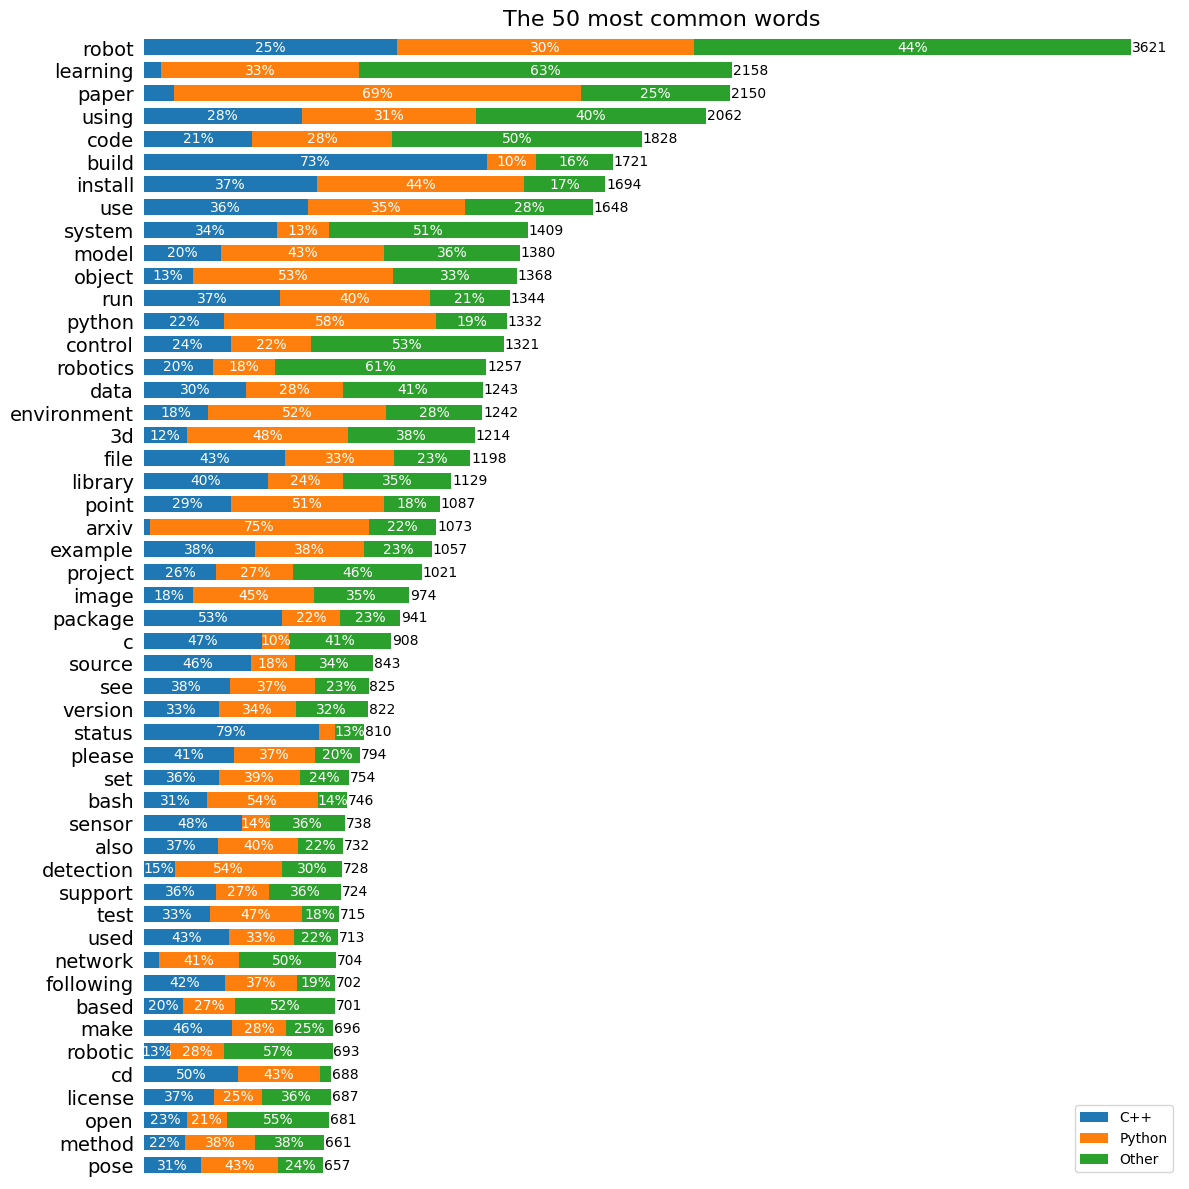

In [11]:
# Plot the top 20 words using a horizontal stacked bar chart

vis.plot_top_words(word_counts, column='all', top_n=50, figsize=(12, 12))

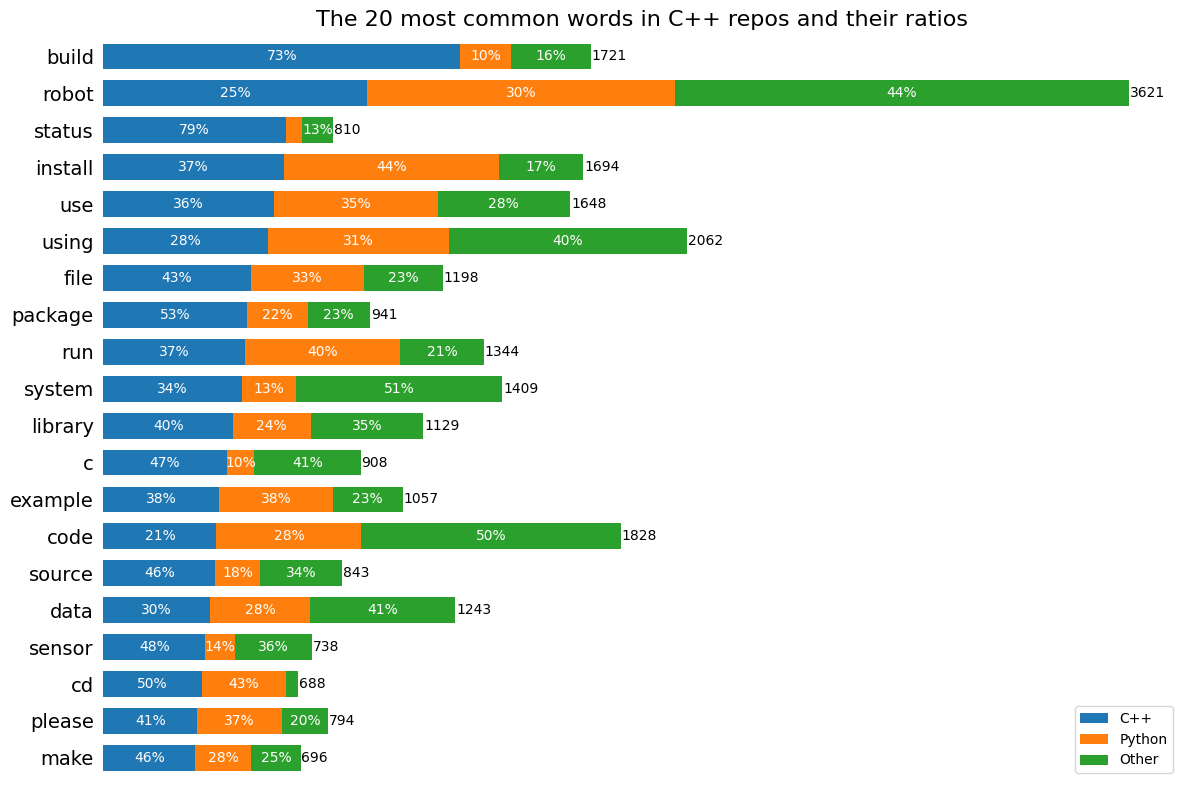

In [12]:
# Plot the top 20 words for C++ using a horizontal stacked bar chart
vis.plot_top_words(word_counts, column='C++', top_n=20, figsize=(12, 8), title= 'The 20 most common words in C++ repos and their ratios')

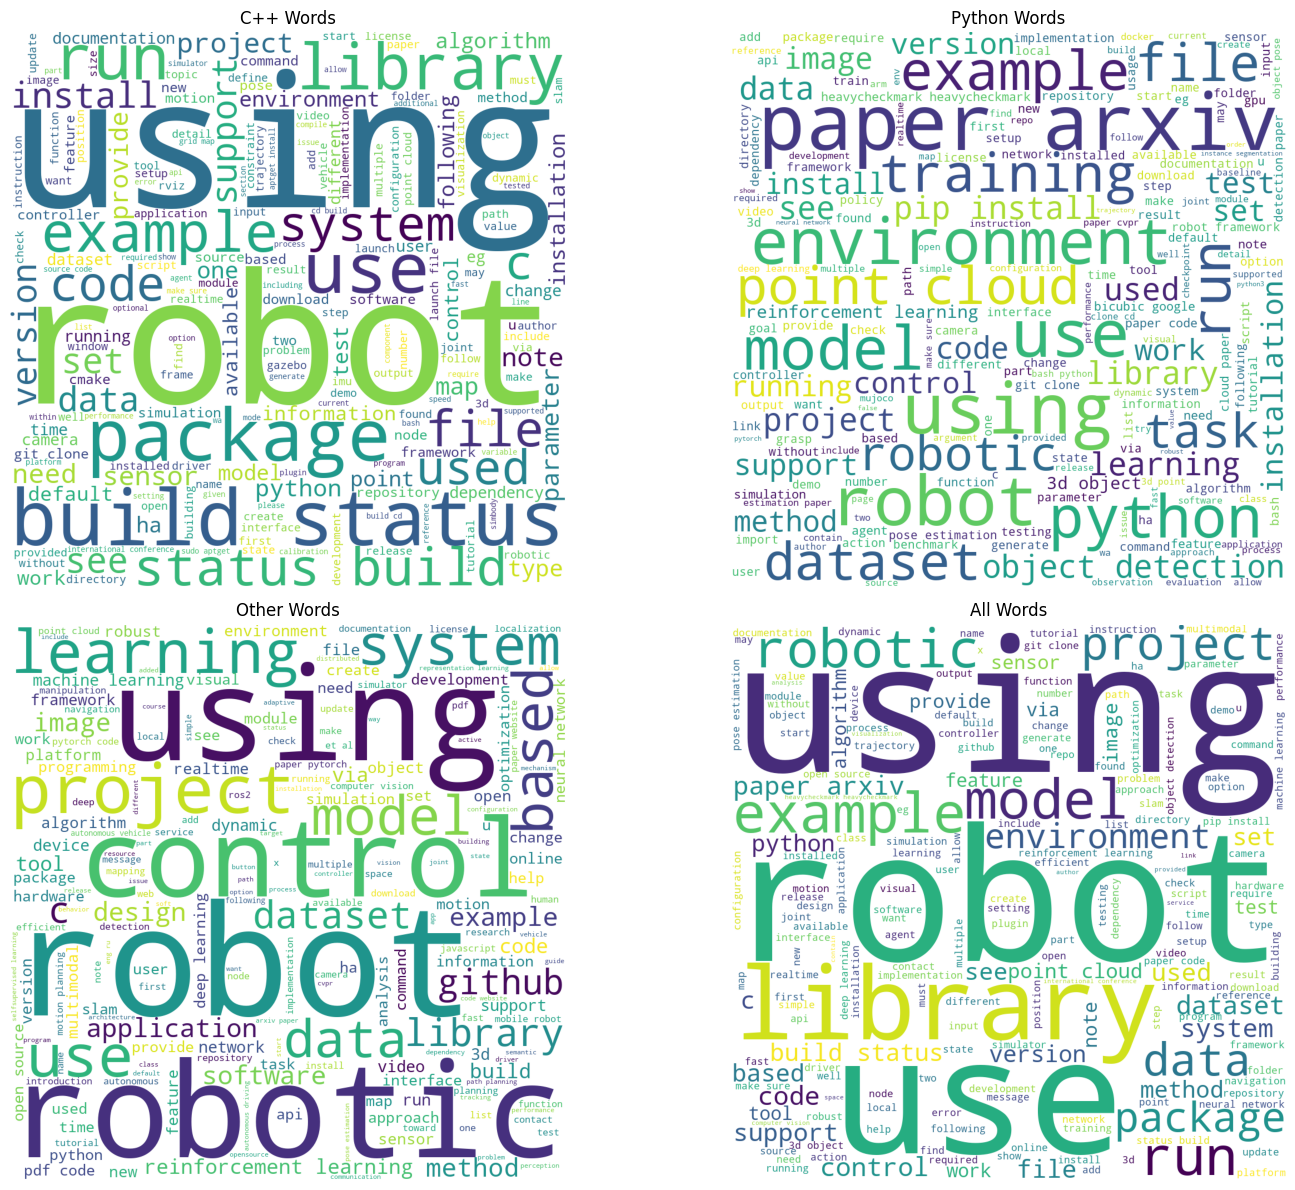

In [13]:
# Generate and display word clouds for different language sets
vis.word_clouds(repos_df)

In [14]:
cpp_text, python_text, other_text, all_text = exp.join_text(repos_df)
cpp_words, python_words, other_words, all_words = exp.list_words(repos_df)
cpp_freq, python_freq, other_freq, all_freq = exp.word_freq(repos_df)

In [15]:
type(cpp_words)

pandas.core.series.Series

## No functions have been created for the work below 

In [16]:
cpp_ratio_words = vis.calculate_ratios(repos_df, min_count_cpp=100, min_count_python=100, min_count_other=100, sort_column='p_C++')
cpp_ratio_words

,all,C++,Python,Other,p_C++,p_Python,p_Other
build,1721,1260,178,283,73.0,10.0,16.0
package,941,507,214,220,54.0,23.0,23.0
map,605,315,112,178,52.0,19.0,29.0
sensor,738,360,105,273,49.0,14.0,37.0
source,843,395,159,289,47.0,19.0,34.0
cloud,594,115,306,173,19.0,52.0,29.0
detection,728,114,394,220,16.0,54.0,30.0
3d,1214,157,594,463,13.0,49.0,38.0
object,1368,179,736,453,13.0,54.0,33.0
paper,2150,111,1494,545,5.0,69.0,25.0


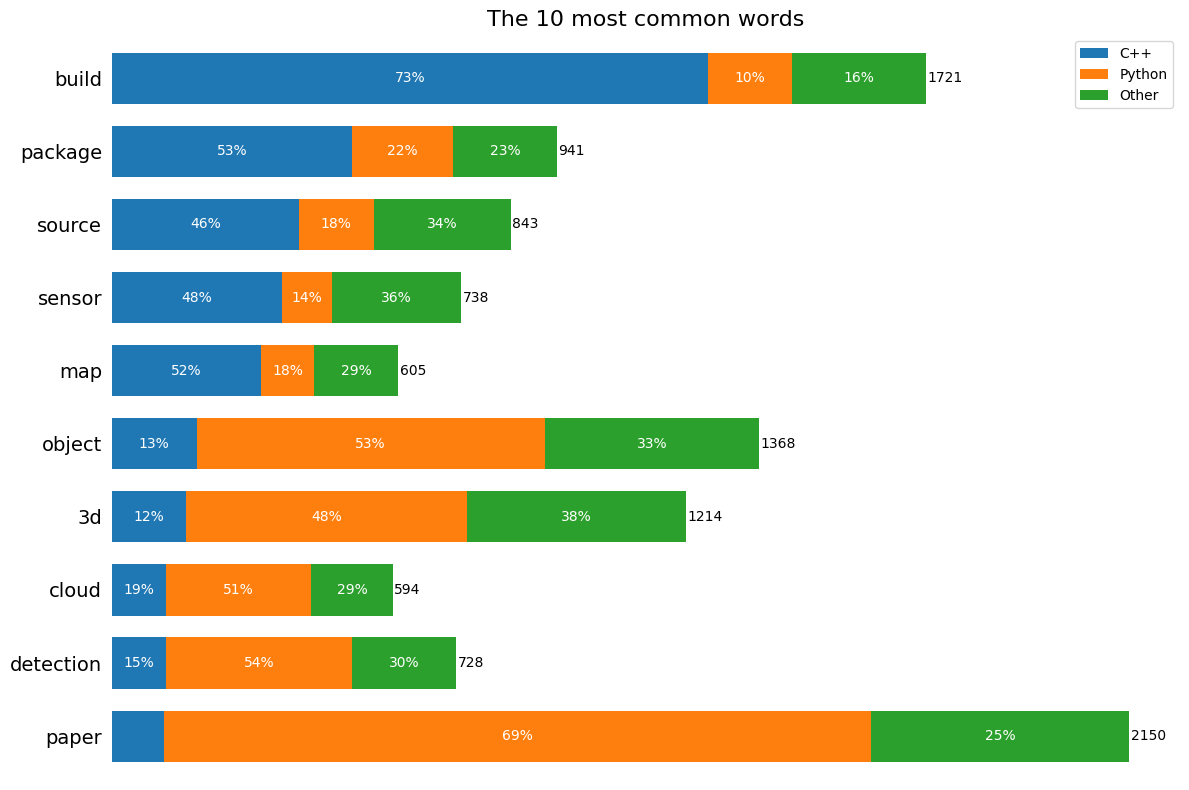

In [17]:
# Plot the top 20 words for C++ using a horizontal stacked bar chart
vis.plot_top_words(cpp_ratio_words, column='C++', top_n=10, figsize=(12, 8))

In [18]:
top_20_cpp_bigrams = exp.get_top_n_bigrams(python_words, 2, top_n= 20, remove_delimiter=True)
top_20_cpp_bigrams

AttributeError: module 'explore' has no attribute 'get_top_n_bigrams'

In [ ]:
top_20_cpp_bigrams = exp.get_top_n_bigrams(python_words, 2, top_n= 20, remove_delimiter=True)
top_20_cpp_bigrams

(paper, arxiv)                      632
(point, cloud)                      299
(object, detection)                 248
(pip, install)                      233
(reinforcement, learning)           185
(3d, object)                        177
(heavycheckmark, heavycheckmark)    175
(bicubic, google)                   160
(paper, code)                       152
(pose, estimation)                  128
(git, clone)                        122
(detection, paper)                  107
(robot, framework)                   96
(cloud, paper)                       89
(estimation, paper)                  80
(object, pose)                       77
(deep, learning)                     74
(bash, python)                       66
(make, sure)                         66
(3d, point)                          65
Name: count, dtype: int64

In [45]:
import nltk
import pandas as pd

def get_top_n_ngrams(series, num_words, top_n, remove_delimiter=False):
    """
    Get the top N n-grams from a Series of text data.

    Parameters:
    series (Series): A Series containing text data.
    num_words (int): The number of words to consider for creating n-grams.
    top_n (int): The number of top n-grams to retrieve.
    remove_delimiter (bool): Whether to remove delimiters from the n-grams. Defaults to False.

    Returns:
    Series: A Series with the top N n-grams and their counts.
    """
    # Create n-grams directly from the input series
    ngrams = list(nltk.ngrams(series, num_words))

    if remove_delimiter:
        # Remove delimiters from n-grams by joining without commas
        ngrams = [tuple(" ".join(word.split(",")) for word in ngram) for ngram in ngrams]

    # Create a Series of n-gram counts and retrieve the top N n-grams
    top_ngrams = (pd.Series(ngrams)
                  .value_counts()
                  .head(top_n))

    # Display n-grams without commas
    top_ngrams.index = [' '.join(ngram) for ngram in top_ngrams.index]

    return top_ngrams

# Test the updated function with bigrams and display without commas
top_20_cpp_bigrams = get_top_n_ngrams(python_words, 2, top_n=20, remove_delimiter=False)
print(top_20_cpp_bigrams)


paper arxiv                      632
point cloud                      299
object detection                 248
pip install                      233
reinforcement learning           185
3d object                        177
heavycheckmark heavycheckmark    175
bicubic google                   160
paper code                       152
pose estimation                  128
git clone                        122
detection paper                  107
robot framework                   96
cloud paper                       89
estimation paper                  80
object pose                       77
deep learning                     74
bash python                       66
make sure                         66
3d point                          65
Name: count, dtype: int64


In [5]:
import nltk
import pandas as pd

def get_top_n_ngrams(series, num_words, top_n, remove_delimiter=False):
    """
    Get the top N n-grams from a Series of text data.

    Parameters:
    series (Series): A Series containing text data.
    num_words (int): The number of words to consider for creating n-grams.
    top_n (int): The number of top n-grams to retrieve.
    remove_delimiter (bool): Whether to remove delimiters from the n-grams. Defaults to False.

    Returns:
    Series: A Series with the top N n-grams and their counts.
    """
    # Create n-grams directly from the input series
    ngrams = list(nltk.ngrams(series, num_words))

    # if remove_delimiter:
    #     # Remove delimiters from n-grams by joining without commas
    #     ngrams = [tuple(" ".join(word.split(",")) for word in ngram) for ngram in ngrams]

    # Create a Series of n-gram counts and retrieve the top N n-grams
    top_ngrams = (pd.Series(ngrams)
                  .value_counts()
                  .head(top_n))

    if remove_delimiter:
        # If remove_delimiter is True, join the words in the n-grams and remove delimiters
        top_ngrams.index = [' '.join(gram) for gram in top_ngrams.index]

    return top_ngrams

# Test the updated function with bigrams and display without commas
top_20_cpp_bigrams = get_top_n_ngrams(python_words, 2, top_n=20, remove_delimiter=False)
print(top_20_cpp_bigrams)


NameError: name 'python_words' is not defined

In [46]:
# Test the updated function with bigrams and display without commas
top_20_cpp_bigrams = get_top_n_ngrams(python_words, 3, top_n=20, remove_delimiter=False)
print(top_20_cpp_bigrams)

3d object detection                             130
heavycheckmark heavycheckmark heavycheckmark    122
object detection paper                           89
point cloud paper                                89
224 0875 bicubic                                 65
0875 bicubic google                              65
git clone cd                                     61
3d point cloud                                   58
detection paper arxiv                            56
10 bicubic google                                53
object pose estimation                           52
deep reinforcement learning                      51
estimation paper arxiv                           49
pose estimation paper                            47
cloud paper arxiv                                44
pip install e                                    43
6d object pose                                   43
paper code arxiv                                 42
sudo aptget install                              38
pip install 

In [21]:
top_20_cpp_bigrams.info()

<class 'pandas.core.series.Series'>
Index: 20 entries, ('paper', 'arxiv') to ('3d', 'point')
Series name: count
Non-Null Count  Dtype
--------------  -----
20 non-null     int64
dtypes: int64(1)
memory usage: 876.0+ bytes


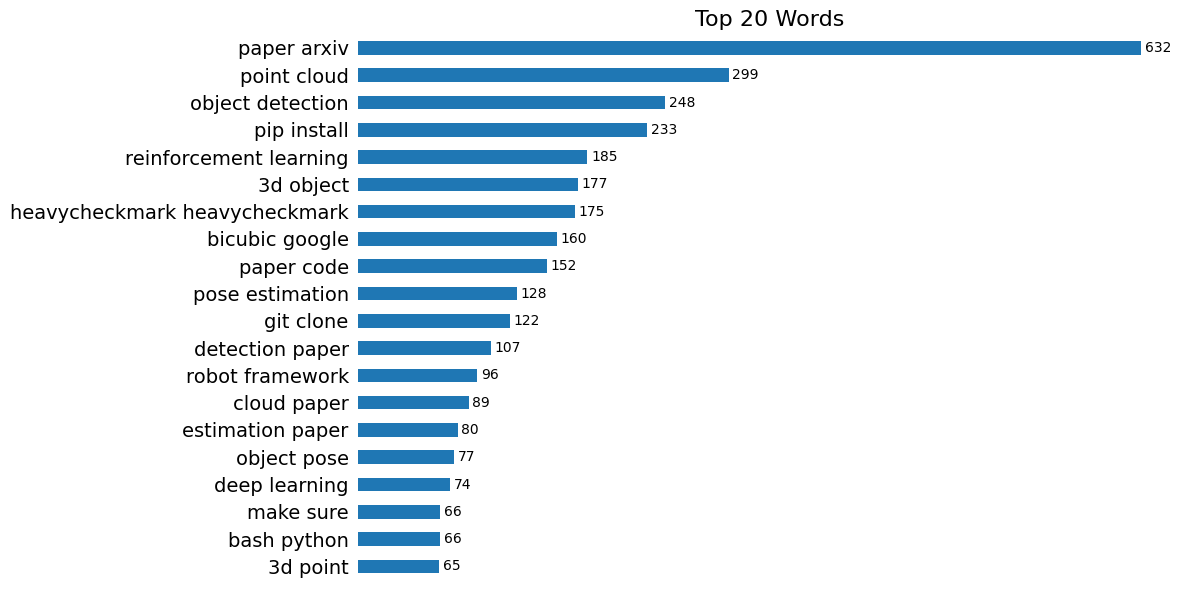

In [30]:
vis.plot_ngrams(top_20_cpp_bigrams, top_n=20, figsize=(12, 6), title=None)